# Generation of data for training and testing



## Imports

In [1]:
# Python
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Torch
import torch

# PhotonTorch
import photontorch as pt

# Progress Bars
from tqdm.notebook import tqdm
from tqdm.notebook import trange

# save the record
import inspect

# avoid truncation in print
import sys
np.set_printoptions(threshold=1000)
np.set_printoptions(edgeitems=3)



###################### disactivate print => debug = False ############ activate print => debug = True #################################à
debug = False

# Data

## Data parameters & settings

In [2]:
data_size = 10000
test_data_size = 50
limit = {"high":1,"low":0}
generator = np.random.default_rng()
classes = {"class1":[1,0,0,0], "class2":[0,1,0,0], "class3": [0,0,1,0], "class4": [0,0,0,1] }
################## randomize mean and std_deviation for each class ################
# mean = {"mean1":[np.random.random(),np.random.random(),np.random.random(),np.random.random()], 
#         "mean2":[np.random.random(),np.random.random(),np.random.random(),np.random.random()], 
#         "mean3":[np.random.random(),np.random.random(),np.random.random(),np.random.random()], 
#         "mean4":[np.random.random(),np.random.random(),np.random.random(),np.random.random()],}
# std_deviation = {"std_deviation1":[np.random.random()/10,np.random.random()/10,np.random.random()/10,np.random.random()/10], 
#                 "std_deviation2":[np.random.random()/10,np.random.random()/10,np.random.random()/10,np.random.random()/10], 
#                 "std_deviation3":[np.random.random()/10,np.random.random()/10,np.random.random()/10,np.random.random()/10], 
#                 "std_deviation4":[np.random.random()/10,np.random.random()/10,np.random.random()/10,np.random.random()/10], }

mean = {"mean1":[0.2, 0.8, 0.3, 0.7], 
        "mean2":[0.4, 0.2, 0.9, 0.3], 
        "mean3":[0.3, 0.4, 0.1, 0.6], 
        "mean4":[0.5, 0.6, 0.7, 0.4]}
std_deviation = {"std_deviation1": [0.05, 0.05, 0.05, 0.05], 
                "std_deviation2": [0.05, 0.05, 0.05, 0.05], 
                "std_deviation3": [0.05, 0.05, 0.05, 0.05], 
                "std_deviation4": [0.05, 0.05, 0.05, 0.05] }


## Generation the data set

In [3]:
# class_to_generate = np.random.randint(1,5)
# print([generator.normal( loc=mean.get("mean{}".format(class_to_generate))[0], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[0]),
#                   generator.normal( loc=mean.get("mean{}".format(class_to_generate))[1], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[1]),
#                   generator.normal( loc=mean.get("mean{}".format(class_to_generate))[2], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[2]),
#                   generator.normal( loc=mean.get("mean{}".format(class_to_generate))[3], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[3]),])
# print(class_to_generate)
# print([[mean.get("mean{}".format(class_to_generate))[0], std_deviation.get("std_deviation{}".format(class_to_generate))[0]],
#        [mean.get("mean{}".format(class_to_generate))[1], std_deviation.get("std_deviation{}".format(class_to_generate))[1]],
#        [mean.get("mean{}".format(class_to_generate))[2], std_deviation.get("std_deviation{}".format(class_to_generate))[2]],
#        [mean.get("mean{}".format(class_to_generate))[3], std_deviation.get("std_deviation{}".format(class_to_generate))[3]]]),
# print(classes.get("class{}".format(class_to_generate)))

In [4]:
# the final structure of the data should be somenthing like
#       [[[input1,input2,input3,input4],[output1,output2,output3,output4]],                                                                              
#  N     [[input1,input2,input3,input4],[output1,output2,output3,output4]],                                                                        
#  |     [[input1,input2,input3,input4],[output1,output2,output3,output4]],                                                                        
#  T                                  .                                           
#  I                                  .                                           
#  M                                  .                                           
#  E                                  .                                           
#  S     [[input1,input2,input3,input4],[output1,output2,output3,output4]],                                                                        
#        [[input1,input2,input3,input4],[output1,output2,output3,output4]],                                                                       
#        [[input1,input2,input3,input4],[output1,output2,output3,output4]]]   

############################################ training data ########################################################################################àà
data = np.empty((data_size,2,4)) #2 and 4 to create a couple of input-output array. the array are composed of 4 values

for i in range(data_size):
    class_to_generate = np.random.randint(1,5)
    data[i][0] = [generator.normal( loc=mean.get("mean{}".format(class_to_generate))[0], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[0]),
                  generator.normal( loc=mean.get("mean{}".format(class_to_generate))[1], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[1]),
                  generator.normal( loc=mean.get("mean{}".format(class_to_generate))[2], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[2]),
                  generator.normal( loc=mean.get("mean{}".format(class_to_generate))[3], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[3]),]
    data[i][1] = classes.get("class{}".format(class_to_generate))
#make sure that all the data are between [0,1]
data = data.clip(0,1)

if(debug):
    print(mean)
    print(std_deviation) 
    print(data)    

############################################ test data ########################################################################################àà
test = np.empty((test_data_size,2,4))
for i in range(test_data_size):
    class_to_generate = np.random.randint(1,5)
    test[i][0] = [generator.normal( loc=mean.get("mean{}".format(class_to_generate))[0], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[0]),
                  generator.normal( loc=mean.get("mean{}".format(class_to_generate))[1], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[1]),
                  generator.normal( loc=mean.get("mean{}".format(class_to_generate))[2], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[2]),
                  generator.normal( loc=mean.get("mean{}".format(class_to_generate))[3], scale=std_deviation.get("std_deviation{}".format(class_to_generate))[3]),]
    test[i][1] = classes.get("class{}".format(class_to_generate))
#make sure that all the data are between [0,1]
test = test.clip(0,1)

if(debug):
    print(mean)
    print(std_deviation) 
    print(test)

with np.printoptions(threshold=np.inf):

    with open("test_file_1layer.txt","w") as file:
        file.write("{}".format(test))
    with open("data_file_1layer.txt","w") as file:
        file.write("{}".format(data))



## Data visualization

### Plot data for traning

In [5]:
import plotly as px
#preapare data
x=data[:, 0, 0]
y=data[:, 0, 1]
z=data[:, 0, 2]
color=data[:, 0, 3]
symbol = []
for i in data[:,1]:
    symbol.append(str(torch.argmax(torch.tensor(i, dtype=torch.get_default_dtype())).item()+1))
symbol = ["square" if item == "1" else item for item in symbol]
symbol = ["circle" if item == "2" else item for item in symbol]
symbol = ["diamond" if item == "3" else item for item in symbol]
symbol = ["cross" if item == "4" else item for item in symbol]

#prepare plot
fig1 = px.graph_objs.Scatter3d(x=x, y=y, z=z, marker=dict(color=color, symbol=symbol, opacity=0.9), line=dict(width=0.02), mode='markers')

mylayout = px.graph_objs.Layout(scene=dict(xaxis=dict( title="value 1"), yaxis=dict( title="value 2"), zaxis=dict(title="value 3")))


#Plot and save html
px.offline.plot({"data": [fig1], "layout": mylayout}, auto_open=True, filename=("data_training.html"))

'data_training.html'

### Plot training scattering matrix

In [6]:
import plotly.express as px
#preapare data
scattering_matrix_data = []
for i in data[:]:
    scattering_matrix_data.append([i[0][0],i[0][1],i[0][2],i[0][3],str(torch.argmax(torch.tensor(i[1],  dtype=torch.get_default_dtype())).item()+1)])

#plot
fig = px.scatter_matrix(scattering_matrix_data, dimensions=[0, 1, 2, 3], color=4)
fig.update_traces(diagonal_visible=False)
fig.show()

### Plot data for testing

In [7]:
import plotly as px
#preapare data
x=test[:, 0, 0]
y=test[:, 0, 1]
z=test[:, 0, 2]
color=test[:, 0, 3]
symbol = []
for i in test[:,1]:
    symbol.append(str(torch.argmax(torch.tensor(i, dtype=torch.get_default_dtype())).item()+1))
symbol = ["square" if item == "1" else item for item in symbol]
symbol = ["circle" if item == "2" else item for item in symbol]
symbol = ["diamond" if item == "3" else item for item in symbol]
symbol = ["cross" if item == "4" else item for item in symbol]

#prepare plot
fig1 = px.graph_objs.Scatter3d(x=x, y=y, z=z, marker=dict(color=color, symbol=symbol, opacity=0.9), line=dict(width=0.02), mode='markers')

mylayout = px.graph_objs.Layout(scene=dict(xaxis=dict( title="value 1"), yaxis=dict( title="value 2"), zaxis=dict(title="value 3")))


#Plot and save html
px.offline.plot({"data": [fig1], "layout": mylayout}, auto_open=True, filename=("data_test.html"))

'data_test.html'

### Plot test scattering matrix

In [8]:
import plotly.express as px
#preapare data
scattering_matrix_data = []
for i in test[:]:
    scattering_matrix_data.append([i[0][0],i[0][1],i[0][2],i[0][3],str(torch.argmax(torch.tensor(i[1], dtype=torch.get_default_dtype())).item()+1)])

#plot
fig = px.scatter_matrix(scattering_matrix_data, dimensions=[0, 1, 2, 3], color=4)
fig.update_traces(diagonal_visible=False)
fig.show()

# Network - Circuit

### MZI


In [9]:
class MZI(pt.Network):
    def __init__(self, kc1=.5,kc2=.5,wga=pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi),wgb=pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi)):
        super(MZI, self).__init__() # always initialize first
        self.wg1 = wga #pt.Waveguide(trainable=True, phase= 0)
        self.wg2 = wgb #pt.Waveguide(trainable=True, phase= 0)
        self.wg3 = pt.Waveguide(trainable=False)
        self.wg4 = pt.Waveguide(trainable=False)
        self.dc1 = pt.DirectionalCoupler(coupling=kc1, trainable=False)
        self.dc2 = pt.DirectionalCoupler(coupling=kc2, trainable=False)
        self.link(3,"3:dc1:2", "0:wg1:1", "3:dc2:2", "0:wg2:1", 2)
        self.link(0,"0:dc1:1","0:wg3:1", "0:dc2:1", "0:wg4:1", 1)

### Activation Function

In [10]:
class ActivationFunction(pt.Network):
    def __init__(self):
        super().__init__()
        self.soi1 = pt.AgrawalSoa(I = 0.0, L=5.e-3 ,W=1e-6)
        self.soi2 = pt.AgrawalSoa(I=1.7,W=4e-6)
        self.link(0,"0:soi1:1","0:soi2:1",1)

print(torch.where(ActivationFunction().free_ports_at)[0])

Buffer containing:
Buffer([0, 5])


### Network - Circuit definition

#### Circuit and Simulation parameters

In [11]:
# circuit  and simulation parameters



#### Circuit - Definition

In [12]:
# class Layer4x4(pt.Network):
#     def __init__(self):
#         super().__init__()
#         # termination - empty ports on mzis
#         self.trm1 = pt.Term()
#         self.trm2 = pt.Term()
#         self.trm3 = pt.Term()
#         self.trm4 = pt.Term()
#         self.trm5 = pt.Term()
#         self.trm6 = pt.Term()
#         self.trm7 = pt.Term()
#         self.trm8 = pt.Term()
#         self.trm9 = pt.Term()
#         self.trm10 = pt.Term()
#         self.trm11 = pt.Term()
#         self.trm12 = pt.Term()
#         #random angle
#         #mzi- core
#         self.mzi1 = MZI(wga = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi), wgb = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi))
#         self.mzi3 = MZI(wga = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi), wgb = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi))
#         self.mzi2 = MZI(wga = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi), wgb = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi))
#         self.mzi4 = MZI(wga = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi), wgb = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi))
#         self.mzi5 = MZI(wga = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi), wgb = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi))
#         self.mzi6 = MZI(wga = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi), wgb = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi))
#         #mzi - sum
#         self.su1 = MZI(wga = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi), wgb = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi))
#         self.su2 = MZI(wga = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi), wgb = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi))
#         #mzi - out
#         self.out1 = MZI(wga = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi), wgb = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi))
#         self.out2 = MZI(wga = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi), wgb = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi))
#         self.out3 = MZI(wga = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi), wgb = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi))
#         self.out4 = MZI(wga = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi), wgb = pt.Waveguide(trainable=True, phase= np.random.random()*2*np.pi))
#         # #ReLu
#         # self.act1 = ActivationFunction()
#         # self.act2 = ActivationFunction()
#         # self.act3 = ActivationFunction()
#         # self.act4 = ActivationFunction()

#         # self.link(0,"3:mzi4:2","0:su1:1","3:mzi5:2","0:su2:1","3:mzi6:2","3:out4:2","0:act1:1",4)
#         # self.link(1,"0:mzi4:1","3:mzi2:2","0:mzi5:1","3:mzi3:2","0:mzi6:1","3:out3:2","0:act2:1",5)
#         # self.link(2,"0:mzi2:1","3:mzi1:2","0:mzi3:1","3:out2:2","0:act3:1",6)
#         # self.link(3,"0:mzi1:1","3:out1:2","0:act4:1",7)

#         self.link(0,"3:mzi4:2","0:su1:1","3:mzi5:2","0:su2:1","3:mzi6:2","3:out4:2",4)
#         self.link(1,"0:mzi4:1","3:mzi2:2","0:mzi5:1","3:mzi3:2","0:mzi6:1","3:out3:2",5)
#         self.link(2,"0:mzi2:1","3:mzi1:2","0:mzi3:1","3:out2:2",6)
#         self.link(3,"0:mzi1:1","3:out1:2",7)

#         self.link("trm1:0","3:su1:2","0:trm2")
#         self.link("trm3:0","3:su2:2","0:trm4")
#         self.link("trm5:0","0:out1:1","0:trm6")
#         self.link("trm7:0","0:out2:1","0:trm8")
#         self.link("trm9:0","0:out3:1","0:trm10")
#         self.link("trm11:0","0:out4:1","0:trm12")                

# print(torch.where(Layer4x4().free_ports_at)[0])


In [13]:
class Layer4x4(pt.Network):
    def __init__(self):
        super().__init__()

        # termination - empty ports on mzis
        self.trm1 = pt.Term()
        self.trm2 = pt.Term()
        self.trm3 = pt.Term()
        self.trm4 = pt.Term()
        self.trm5 = pt.Term()
        self.trm6 = pt.Term()
        self.trm7 = pt.Term()
        self.trm8 = pt.Term()
        self.trm9 = pt.Term()
        self.trm10 = pt.Term()
        self.trm11 = pt.Term()
        self.trm12 = pt.Term()
        #phases of the training - import from "MZI Training.ipynb"
        #mzi- core
        self.mz1 = MZI(wga = pt.Waveguide(trainable=True, phase=  5.511269214786659), wgb = pt.Waveguide(trainable=True, phase= 4.471076212304134))
        self.mz3 = MZI(wga = pt.Waveguide(trainable=True, phase=2.0540326066925103), wgb = pt.Waveguide(trainable=True, phase= 6.58561905573238))
        self.mz2 = MZI(wga = pt.Waveguide(trainable=True, phase= 0.7786257630925012), wgb = pt.Waveguide(trainable=True,phase= 2.109536543368054))
        self.mz4 = MZI(wga = pt.Waveguide(trainable=True, phase= 6.04023710764202), wgb = pt.Waveguide(trainable=True, phase= 1.65570692282401))
        self.mz5 = MZI(wga = pt.Waveguide(trainable=True, phase= 2.2982816097813865), wgb = pt.Waveguide(trainable=True, phase= 0.45367019892674343))
        self.mz6 = MZI(wga = pt.Waveguide(trainable=True, phase= 4.434690336164388), wgb = pt.Waveguide(trainable=True, phase= 5.31515594359596))
        #mzi - sum
        self.su1 = MZI(wga = pt.Waveguide(trainable=True, phase= 3.1433636854403333), wgb = pt.Waveguide(trainable=True, phase= 3.759899227156775))
        self.su2 = MZI(wga = pt.Waveguide(trainable=True, phase= 3.1423183089782545), wgb = pt.Waveguide(trainable=True, phase= 5.185065570446145))
        #mzi - out
        self.out1 = MZI(wga = pt.Waveguide(trainable=True, phase= 3.141592684253872), wgb = pt.Waveguide(trainable=True, phase= 2.7383028848699373))
        self.out2 = MZI(wga = pt.Waveguide(trainable=True, phase= 3.141592995276882), wgb = pt.Waveguide(trainable=True, phase= 0.33552349002188975))
        self.out3 = MZI(wga = pt.Waveguide(trainable=True, phase= 3.141592622894886), wgb = pt.Waveguide(trainable=True, phase= 2.3353542077570455))
        self.out4 = MZI(wga = pt.Waveguide(trainable=True, phase= 3.0655330408990333), wgb = pt.Waveguide(trainable=True, phase= -0.2715611340760071))
        self.link(0,"3:mz1:1","3:mz2:2","0:mz3:1","3:mz5:2","0:mz6:2","3:out1:2",4)
        self.link(1,"0:mz1:2","0:su1:1","3:mz3:2","0:su2:1","3:mz6:1","3:out2:2",5)
        self.link(2,"0:mz2:1","3:mz4:2","0:mz5:1","3:out3:2",6)
        self.link(3,"0:mz4:1","3:out4:2",7)
        self.link("trm1:0","3:su1:2","0:trm2")
        self.link("trm3:0","3:su2:2","0:trm4")
        self.link("trm5:0","0:out1:1","0:trm6")
        self.link("trm7:0","0:out2:1","0:trm8")
        self.link("trm9:0","0:out3:1","0:trm10")
        self.link("trm11:0","0:out4:1","0:trm12")
                
        # print(self.connections)

print(torch.where(Layer4x4().free_ports_at)[0])


Buffer containing:
Buffer([  0,   3,  16,  91, 139, 144, 171, 187])


In [14]:
class Circuit(pt.Network):
    def __init__(self, length=1e-5, neff=2.34, ng=3.4, loss=1000):
        super().__init__()
        #input
        self.src1 = pt.Source()
        self.src2 = pt.Source()
        self.src3 = pt.Source()
        self.src4 = pt.Source()
        #output
        self.det1 = pt.Detector()
        self.det2 = pt.Detector()
        self.det3 = pt.Detector()
        self.det4 = pt.Detector()
        #layer
        self.layer1 = Layer4x4()
        # self.layer2 = Layer4x4()
        #activation function
        self.act1 = ActivationFunction()
        self.act2 = ActivationFunction()
        self.act3 = ActivationFunction()
        self.act4 = ActivationFunction()
        # self.act5 = ActivationFunction()
        # self.act6 = ActivationFunction()
        # self.act7 = ActivationFunction()
        # self.act8 = ActivationFunction()

        #connections
        self.link("src1:0","0:layer1:4","0:act1:1","0:det1")
        self.link("src2:0","1:layer1:5","0:act2:1","0:det2")
        self.link("src3:0","2:layer1:6","0:act3:1","0:det3")
        self.link("src4:0","3:layer1:7","0:act4:1","0:det4")
        # self.link("src1:0","0:layer1:4","0:act1:1","0:layer2:4","0:act5:1","0:det1")
        # self.link("src2:0","1:layer1:5","0:act2:1","1:layer2:5","0:act6:1","0:det2")
        # self.link("src3:0","2:layer1:6","0:act3:1","2:layer2:6","0:act7:1","0:det3")
        # self.link("src4:0","3:layer1:7","0:act4:1","3:layer2:7","0:act8:1","0:det4")
        
print(torch.where(Circuit().free_ports_at)[0])


Buffer containing:
Buffer([], dtype=torch.int64)


### Network - Circuit inizialization

In [15]:
circuit = Circuit(length=1.2e-5, neff=2.84, ng=3.2, loss=3.e4)

### Environment - Parameters & inizializtion

In [16]:
#parameters

# create simulation environment
env = pt.Environment(dt=1.500e-13, t1=5.0e-10, wl=1.55e-6,freqdomain=False, grad=True) #important to "turn on" the gradient (grad)

## Caratteristics at the beginnig

### Matrix

In [17]:
# with np.printoptions(threshold=np.inf):
#     with open("connection_matrix.txt","w") as file:
#         connection_matrix = circuit.C
#         file.write("{}".format(connection_matrix))
# print("Connections: \n", connection_matrix)

# with np.printoptions(threshold=np.inf):
#     with open("scattering_matrix.txt","w") as file:
#         scattering_matrix = circuit.S
#         file.write("{}".format(scattering_matrix))
# print("Scattering matrix:", scattering_matrix)


### Plot cunfusion matrix

  0%|          | 0/1 [00:00<?, ?it/s]

tensor([0.4461, 0.1924, 0.9229, 0.3154], names=('s',))
[2, 4]


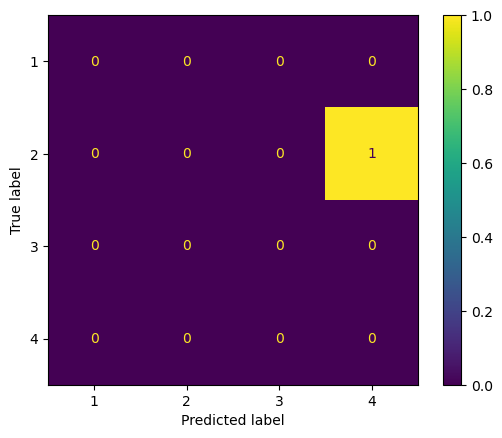

In [18]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay

#preapare data
confusion_matrix_value = [] #format is [[real class],[predicted class]]
with env:
    for i in tqdm(range(1)): #len(test)
        source = test[i][0]
        source = torch.tensor(source, device=circuit.device, dtype=torch.get_default_dtype()).rename("s")
        print(source)
        target = test[i][1]
        target = torch.tensor(target, device=circuit.device, dtype=torch.get_default_dtype())
        detected = circuit(source=source)
        # print("detected :",torch.argmax((detected[-1,0,:,0])).item()+1)
        # print("target :", (torch.argmax(target)).item()+1)
        confusion_matrix_value.append([(torch.argmax(target)).item()+1,torch.argmax((detected[-1,0,:,0])).item()+1])
        print(confusion_matrix_value[-1])
        
#plot
confusion_matrix_value = np.array(confusion_matrix_value)

confusion_matrix_graph = ConfusionMatrixDisplay.from_predictions(confusion_matrix_value[:,0].tolist(), confusion_matrix_value[:,1].tolist(), labels=[1, 2, 3, 4])



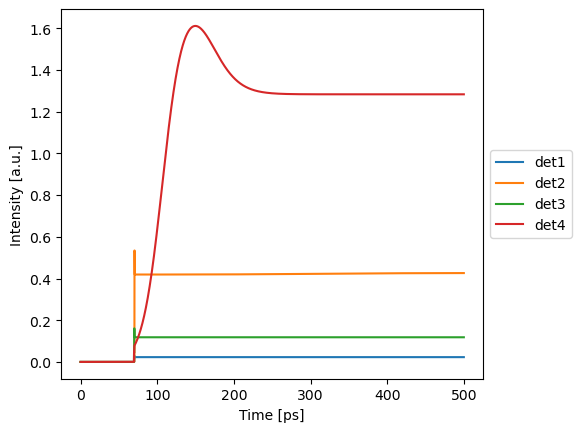

In [19]:
circuit.plot(detected=detected)
plt.show()

# Training - successive approximations of the gradient

to test the network assign the input to the source and run. <br>
each cycle the gain of the gradients are decreased to fine tuning the phases.

  0%|          | 0/50 [00:00<?, ?it/s]

5.542821910800626
4.913930543606779
1.442243146590189
1.0195002544613245
0.5453276815366099
1.8414119313066448
6.496238846073129
2.122868106237815
2.3328289385095555
1.5936748617644325
5.057395668155054
6.638573157394469
3.3589841740598385
3.759899227156775
3.430053564341613
5.185065570446145
3.64482587999788
4.061708683506739
3.3440898656226383
0.8691802527496593
2.8164415844074995
1.1201650851491167
2.6984958248174538
4.197041286694654


  0%|          | 0/50 [00:00<?, ?it/s]

5.441210281833387
4.866242772828456
1.5915725047192897
0.9616583042042475
0.5284017891204486
1.830023683063186
6.4119693732605425
2.0751930091846087
2.3772688713699126
1.561416445464056
5.2149714842540424
6.602529723885453
3.3293209479862598
3.759899227156775
3.407298090884635
5.185065570446145
3.6154625202774984
4.025662514953885
3.3406292604771832
0.8151262482502726
2.841969159221432
1.10351730280089
2.5881999495379073
3.9017107368952546


  0%|          | 0/50 [00:00<?, ?it/s]

5.3738327283956755
4.842706385304239
1.6709897724226561
0.944587551203669
0.4150195416208726
1.8366354338408546
6.4374397126104785
2.0614104600014644
2.423922778630228
1.5576540639521
5.295541079520458
6.585063512748867
3.3150361959825423
3.759899227156775
3.402880284089368
5.185065570446145
3.604220256641004
4.0081918472351274
3.3498812159034226
0.8117621688284717
2.8675329470116364
1.0936443694998523
2.4749279115803366
3.707817189574127


  0%|          | 0/50 [00:00<?, ?it/s]

5.362295574243152
4.835203305690586
1.6654962889636695
0.9411015392410904
0.448377081086413
1.8298768313076592
6.4731865248003775
2.0461177633139034
2.440368824591795
1.5537786060679937
5.282843539370294
6.581827729950945
3.31240898002533
3.759899227156775
3.402249280842832
5.185065570446145
3.611577603028741
4.004956046541924
3.35035583151149
0.8076355242903865
2.8831838910533922
1.0714543758297013
2.455691956275615
3.6771550134887523


  0%|          | 0/50 [00:00<?, ?it/s]

5.3432577016512335
4.82402810736509
1.6657297126151194
0.9393973961536627
0.4621656352423146
1.82194766577445
6.491228946584657
2.0435685379897817
2.444439168090853
1.5551126223182514
5.281706766249402
6.581800777321245
3.307371105598994
3.759899227156775
3.402144537212686
5.185065570446145
3.617790739821042
4.004928185489425
3.35169994339912
0.8072935293688577
2.8966210954540874
1.0501784226576054
2.4424310333662724
3.6474405035836197


  0%|          | 0/50 [00:00<?, ?it/s]

5.332527068628584
4.813373907344112
1.6658786462299588
0.9389127499540446
0.4751502072330791
1.8131673270609368
6.51091367377203
2.0458356452297446
2.443933019701998
1.558080686804449
5.281760904288699
6.583993349975464
3.302500206499599
3.759899227156775
3.4024335311467944
5.185065570446145
3.624999628955152
4.007119643735315
3.3528709577149196
0.8075854660513503
2.909255985447396
1.030535135182028
2.433611263504467
3.6316518430104203


  0%|          | 0/50 [00:00<?, ?it/s]

5.325082074831538
4.802951945875085
1.6659036862316348
0.9390586401510095
0.4874599316163321
1.804214341536205
6.528527935181438
2.050772099178809
2.4409488042709486
1.5615433966166004
5.282073351578372
6.587061520884129
3.2976614352946902
3.759899227156775
3.4028969135479086
5.185065570446145
3.6326025730537244
4.01018771125221
3.3539202714296263
0.8081256686773056
2.9214325890873485
1.0124965075326948
2.4269145661612415
3.6202968450762745


  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

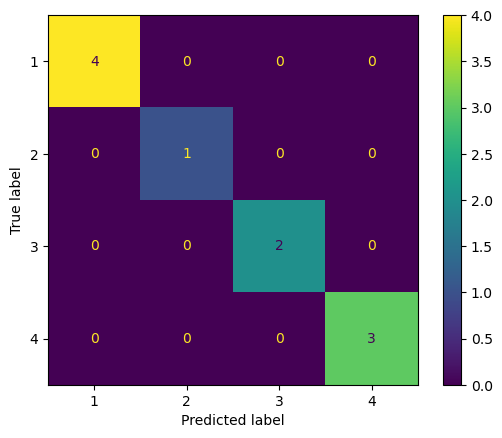

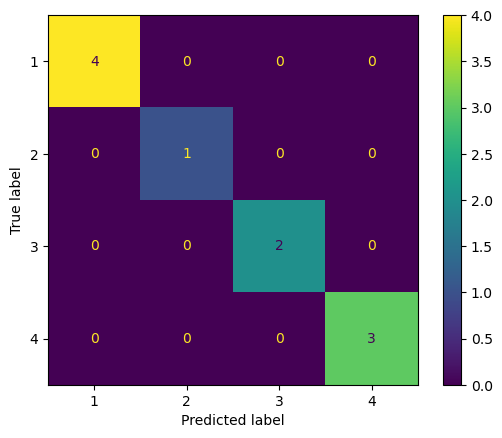

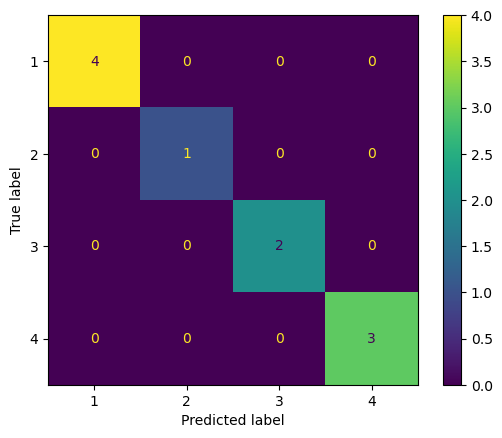

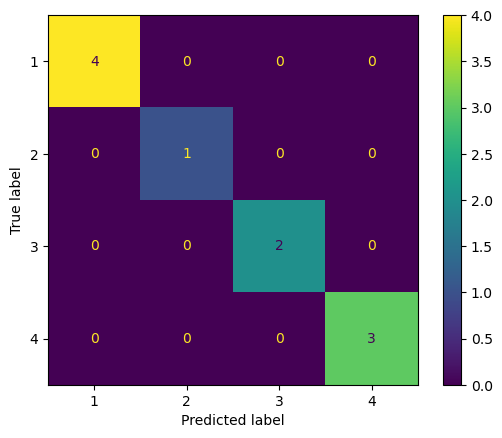

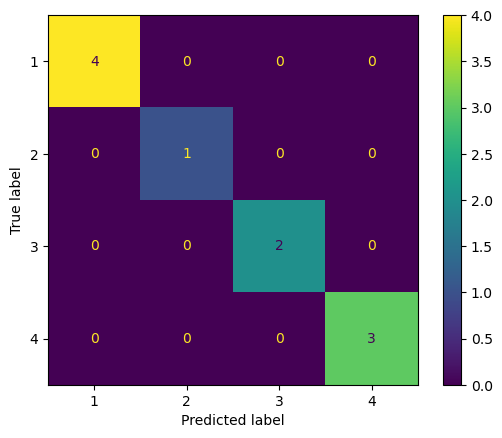

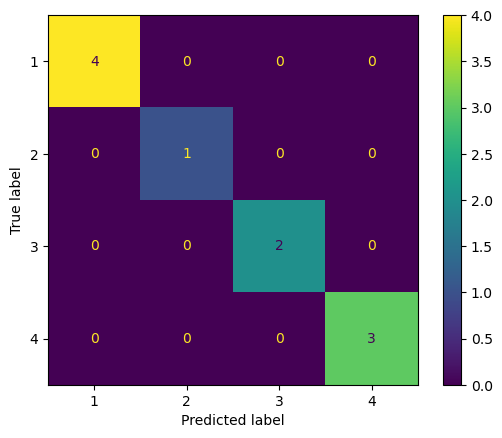

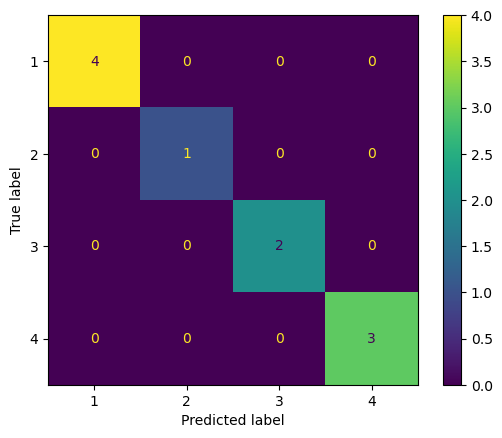

In [21]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
learning_rate = 0.3
for i in range(9):
    #initial settings
    # learning_rate = learning_rate/2 # multiplication factor for the gradients during optimization.
    lossfunc = torch.nn.MSELoss() #type of loss
    optimizer = torch.optim.SGD(circuit.parameters(), learning_rate) #type of optimizazion        

    with env:
        for epoch in tqdm(range(50)): # -> data_size
            optimizer.zero_grad()
            source = data[epoch][0]
            source = torch.tensor(source, device=circuit.device, dtype=torch.get_default_dtype()).rename("s")
            target = data[epoch][1]
            target = torch.tensor(target, device=circuit.device, dtype=torch.get_default_dtype())
            detected = circuit(source=source)[-1,0,:,0] # get the last timestep, the only wavelength, all detectors, the only batch
            loss = lossfunc(detected, target) # calculate the loss (error) between detected and target
            loss.backward() # calculate the resulting gradients for all the parameters of the network
            optimizer.step() # update the networks parameters with the gradients
            del detected, loss, source, target # free up memory (important for GPU)



    #preapare data
    confusion_matrix_value = [] #format is [<real class>,<predicted class>]
    with env:
        # for i in range(len(test)):
        for i in range(10):
            source = test[i][0]
            source = torch.tensor(source, device=circuit.device, dtype=torch.get_default_dtype()).rename("s")
            target = test[i][1]
            target = torch.tensor(target, device=circuit.device, dtype=torch.get_default_dtype())
            detected = circuit(source=source)
            confusion_matrix_value.append([(torch.argmax(target)).item()+1,torch.argmax((detected[-1,0,:,0])).item()+1])
            del detected, source, target
    #plot
    confusion_matrix_value = np.array(confusion_matrix_value)

    confusion_matrix_graph = ConfusionMatrixDisplay.from_predictions(confusion_matrix_value[:,0].tolist(), confusion_matrix_value[:,1].tolist(), labels=[1, 2, 3, 4])

    #parameters
    for p in circuit.parameters():
        print(p.item())
#tutti corretti 
# 5.16324795113231
# 3.705546373397798
# 1.5190462143792032
# -0.008369596371303807
# 0.13503968643405964
# 2.2565089227173782
# 6.578589050397922
# 1.4487224978013926
# 2.1202501437269037
# 0.5570891682863798
# 4.4446184085341605
# 4.839583729546507
# 2.7332190969564105
# 3.759899227156775
# 3.0036082299044704
# 5.185065570446145
# 2.9130200644141766
# 2.262728988052119
# 3.240620078677318
# 0.6037060718262423
# 2.858880806558889
# 1.7171951767529043
# 2.6153806660971815
# 4.717891428504047

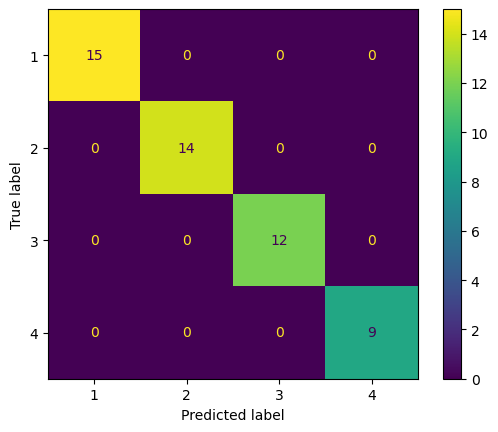

In [22]:
confusion_matrix_value = [] #format is [<real class>,<predicted class>]
with env:
    # for i in range(len(test)):
    for i in range(50):
        source = test[i][0]
        source = torch.tensor(source, device=circuit.device, dtype=torch.get_default_dtype()).rename("s")
        target = test[i][1]
        target = torch.tensor(target, device=circuit.device, dtype=torch.get_default_dtype())
        detected = circuit(source=source)
        confusion_matrix_value.append([(torch.argmax(target)).item()+1,torch.argmax((detected[-1,0,:,0])).item()+1])
        del detected, source, target
#plot
confusion_matrix_value = np.array(confusion_matrix_value)

confusion_matrix_graph = ConfusionMatrixDisplay.from_predictions(confusion_matrix_value[:,0].tolist(), confusion_matrix_value[:,1].tolist(), labels=[1, 2, 3, 4])

# circuit.plot(detected=detected)
# plt.show()

In [ ]:
# import torch
# m = torch.nn.ReLU()
# input = torch.randn(2)
# output = m(input)
# print(input)
# print(output)


# # An implementation of CReLU - https://arxiv.org/abs/1603.05201

# m = torch.nn.ReLU()
# input = torch.randn(2).unsqueeze(0)
# print(input)

# output = torch.cat((m(input), m(-input)))
# print(output)


tensor([-0.2916,  0.4187])
tensor([0.0000, 0.4187])
tensor([[-0.3962, -0.8486]])
tensor([[0.0000, 0.0000],
        [0.3962, 0.8486]])


In [ ]:
#top
# 5.325082074831538
# 4.802951945875085
# 1.6659036862316348
# 0.9390586401510095
# 0.4874599316163321
# 1.804214341536205
# 6.528527935181438
# 2.050772099178809
# 2.4409488042709486
# 1.5615433966166004
# 5.282073351578372
# 6.587061520884129
# 3.2976614352946902
# 3.759899227156775
# 3.4028969135479086
# 5.185065570446145
# 3.6326025730537244
# 4.01018771125221
# 3.3539202714296263
# 0.8081256686773056
# 2.9214325890873485
# 1.0124965075326948
# 2.4269145661612415
# 3.6202968450762745

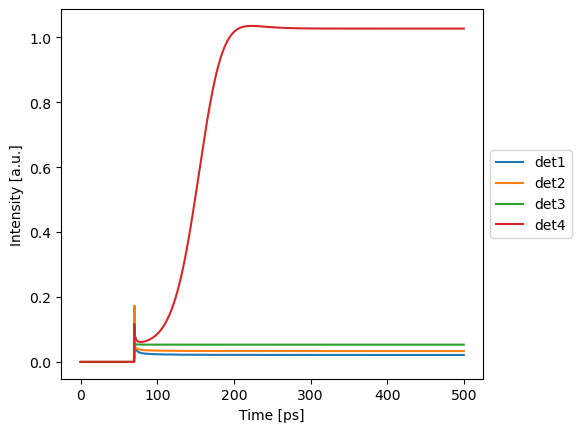

In [46]:
with env:
    source = data[7,0]
    source = torch.tensor(source, device=circuit.device, dtype=torch.get_default_dtype()).rename("s")
    detected = circuit(source)
circuit.plot(detected=detected)
plt.show()

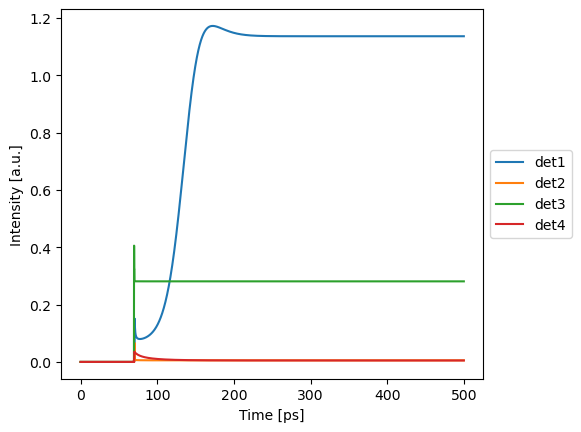

In [47]:
with env:
    source = data[8,0]
    source = torch.tensor(source, device=circuit.device, dtype=torch.get_default_dtype()).rename("s")
    detected = circuit(source)
circuit.plot(detected=detected)
plt.show()

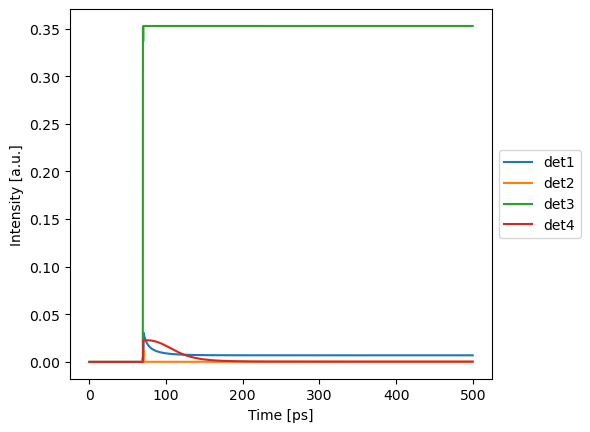

In [48]:
with env:
    source = data[9,0]
    source = torch.tensor(source, device=circuit.device, dtype=torch.get_default_dtype()).rename("s")
    detected = circuit(source)
circuit.plot(detected=detected)
plt.show()

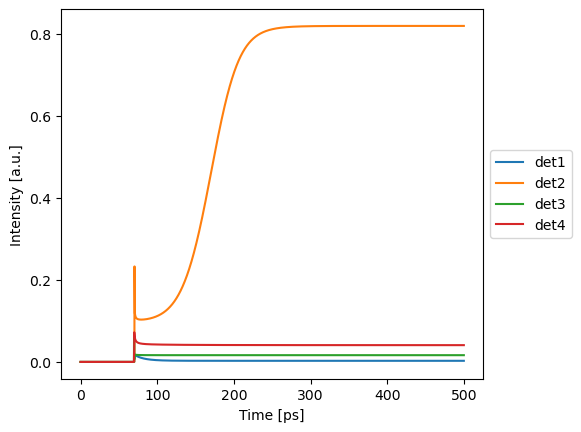

In [49]:
with env:
    source = data[11,0]
    source = torch.tensor(source, device=circuit.device, dtype=torch.get_default_dtype()).rename("s")
    detected = circuit(source)
circuit.plot(detected=detected)
plt.show()

In [1]:
print(torch.sqrt(detected[-1,0,:,0]))

NameError: name 'torch' is not defined

In [50]:
print(data[7:12:1,1])
print(data[7:12:1,0])


[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
[[0.52465122 0.58085793 0.71814939 0.35618576]
 [0.14942186 0.80721002 0.3372358  0.69076034]
 [0.28327762 0.4675193  0.06408329 0.64357238]
 [0.22056    0.41024334 0.14808484 0.59571681]
 [0.38767999 0.21871971 0.86285818 0.27225543]]
